adrasteia
-----
###  01 Gaia Universe Model: Milky Way Sample

gully

March 2016

Tasks:
- Read in the data
- Make a plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import pandas as pd
sns.set_context("talk")

## Read in the data

In [2]:
names = ['byte_range', 'data_type', 'col_ID', 'desc']
fwf_cols = pd.read_fwf('../data/synthetic/gum_mw_columns.tsv',names=names)

In [3]:
fwf_cols.head()

,byte_range,data_type,col_ID,desc
0,1- 19,A19 ---,ID,source identifier (sourceExtendedId)
1,21- 34,F14.10 deg,RA2kdeg,"Right ascension ICRS, Epoch=J2000 (G1)"
2,36- 49,F14.10 deg,DE2kdeg,"Declination ICRS, Epoch=J2000 (G1)"
3,51- 56,F6.3 mag,VMAG,V-band absolute magnitude (meanAbsoluteV)
4,58- 63,F6.3 mag,Gmag,Gaia G-band magnitude (350-1050nm) (magG)


In [4]:
col_names = fwf_cols.col_ID.values

I had to modify the raw data to get it to read in conveniently.  I try not to modify raw data formats (for reproducibility purposes) but there didn't seem to be a convenient way otherwise.  The problem was the `Vtype` column is undefined for most of the file, so a fixed-width-file appears to have no column there, which screws up the last few columns.  I simply labeled the first three columns as "ajun" to make it look like there was something there.  So I will just drop those rows.

In [5]:
gum_mw_alt = pd.read_fwf('../data/synthetic/gum_mw.sam', names=col_names)

In [6]:
gum_mw_alt.drop(["Vamp", "Vper", "Vphase", "Vtype"], inplace=True, axis=1)

In [7]:
gum_mw_alt.head()

,ID,RA2kdeg,DE2kdeg,VMAG,Gmag,GBmag,GRmag,Gsmag,RAdeg,DEdeg,...,omega,T0,Phase,Pop,BeEnv,Radius,a,Teff,vsini,recno
0,*156288953-000002,45.014602,0.023034,8.000,18.465,19.131,17.638,17.269,45.014619,0.023008,...,0,0,0,2,0,0.71,0.0,4345,0.2,1
1,*156288917-000001,44.989952,0.013807,6.600,19.132,19.568,18.511,18.234,44.989963,0.013784,...,0,0,0,2,0,0.83,0.0,5070,0.3,2
2,*156288920-000001+,45.019517,0.044779,4.787,18.130,18.452,17.633,17.409,45.019521,0.044770,...,0,0,0,2,0,0.00,0.0,0,0.0,3
3,*156288920-000001A,45.022343,0.043894,4.800,18.151,18.459,17.671,17.455,45.022347,0.043885,...,0,0,0,2,0,1.16,0.0,6067,19.0,4
4,*156288920-000001B,45.013898,0.046539,9.600,22.352,23.387,21.287,20.802,45.013902,0.046529,...,184,3799830000,0,2,0,0.45,51319.1,3908,2.4,5


In [8]:
col_names

array(['ID', 'RA2kdeg', 'DE2kdeg', 'VMAG', 'Gmag', 'GBmag', 'GRmag',
       'Gsmag', 'RAdeg', 'DEdeg', 'r', 'pmRA', 'pmDE', 'RV', 'V-I', 'Av',
       'Age', '[a/Fe]', 'bAlb', 'e', '[Fe/H]', 'fI', 'gAlb', 'fm', 'Host',
       'i', 'logg', 'Omega', 'Mass', 'Mbol', 'nc', 'nt', 'P', 'omega',
       'T0', 'Phase', 'Pop', 'BeEnv', 'Radius', 'a', 'Teff', 'Vamp',
       'Vper', 'Vphase', 'Vtype', 'vsini', 'recno'], dtype=object)

In [9]:
gum = gum_mw_alt

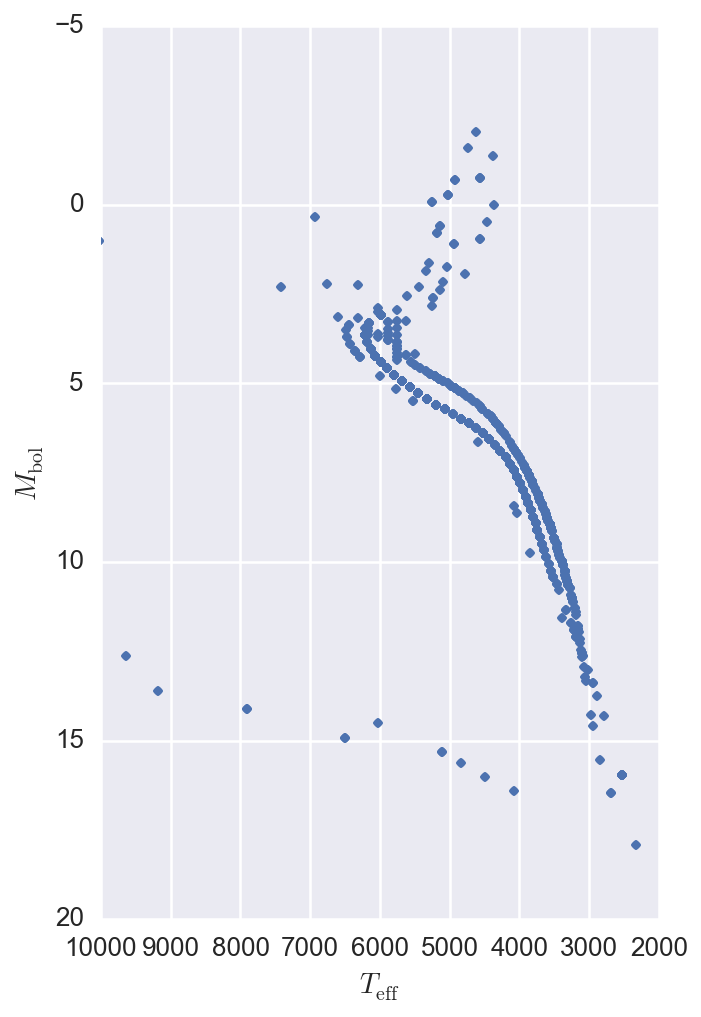

In [10]:
plt.figure(figsize=[5, 8])
#plt.plot(gum['V-I'], gum.Mbol, '.')
plt.plot(gum.Teff, gum.Mbol, '.')
plt.xlim(10000, 2000)
plt.ylim(20, -5)
plt.xlabel("$T_{\mathrm{eff}}$")
plt.ylabel("$M_{\mathrm{bol}}$");

These are the input stars.  The absolute magnitude versus effective temperature.

(0, 10)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


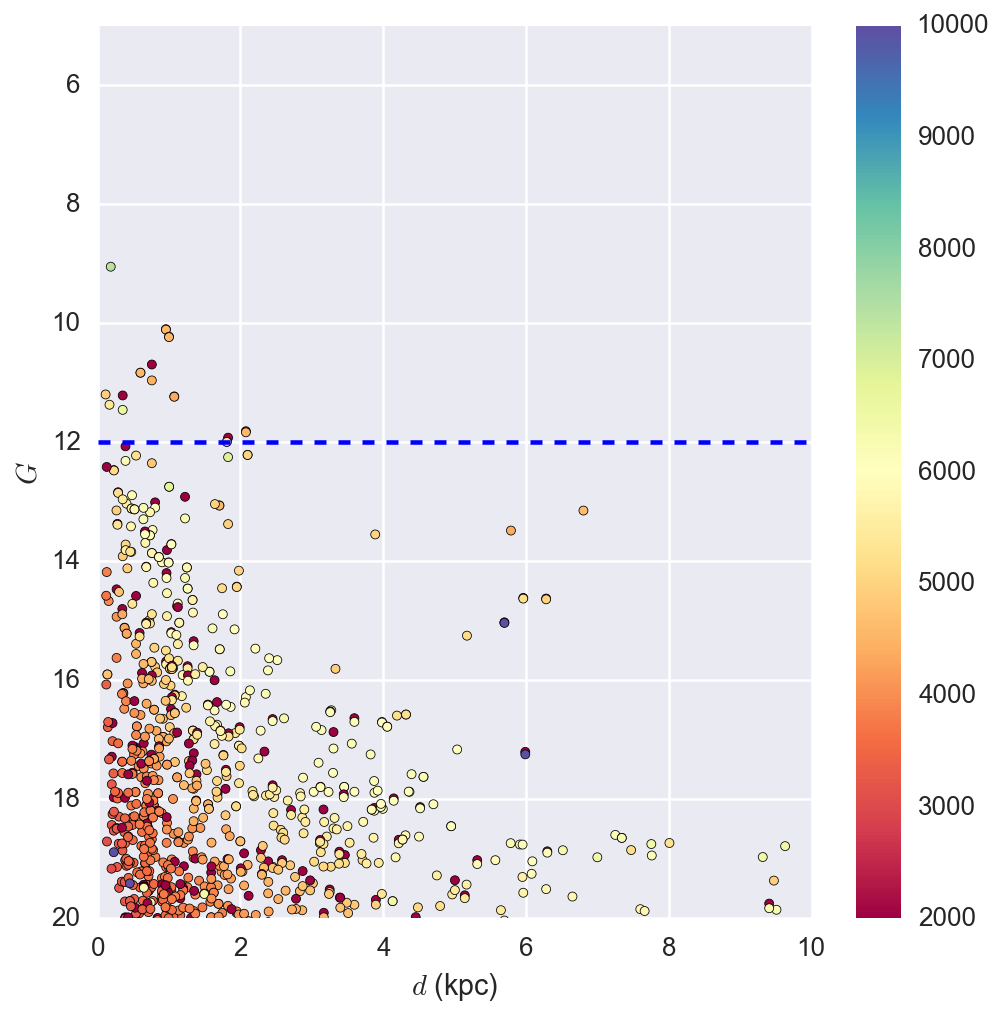

In [11]:
plt.figure(figsize=[8, 8])
#plt.plot(gum['V-I'], gum.Mbol, '.')
sc = plt.scatter(gum.r/1000.0, gum.Gmag, c=gum.Teff, s=20, marker='o', vmin=2000, vmax=10000, cmap="Spectral")
plt.xlabel("$d$ (kpc)")
plt.ylabel("$G$")
plt.hlines(12, 0, 10, colors = 'b', linestyles='--')
plt.colorbar(sc)
plt.ylim(20, 5)
plt.xlim(0, 10)

This is sort-of a Malmquist bias plot.  At a given distance, you can detect the brighter stars.

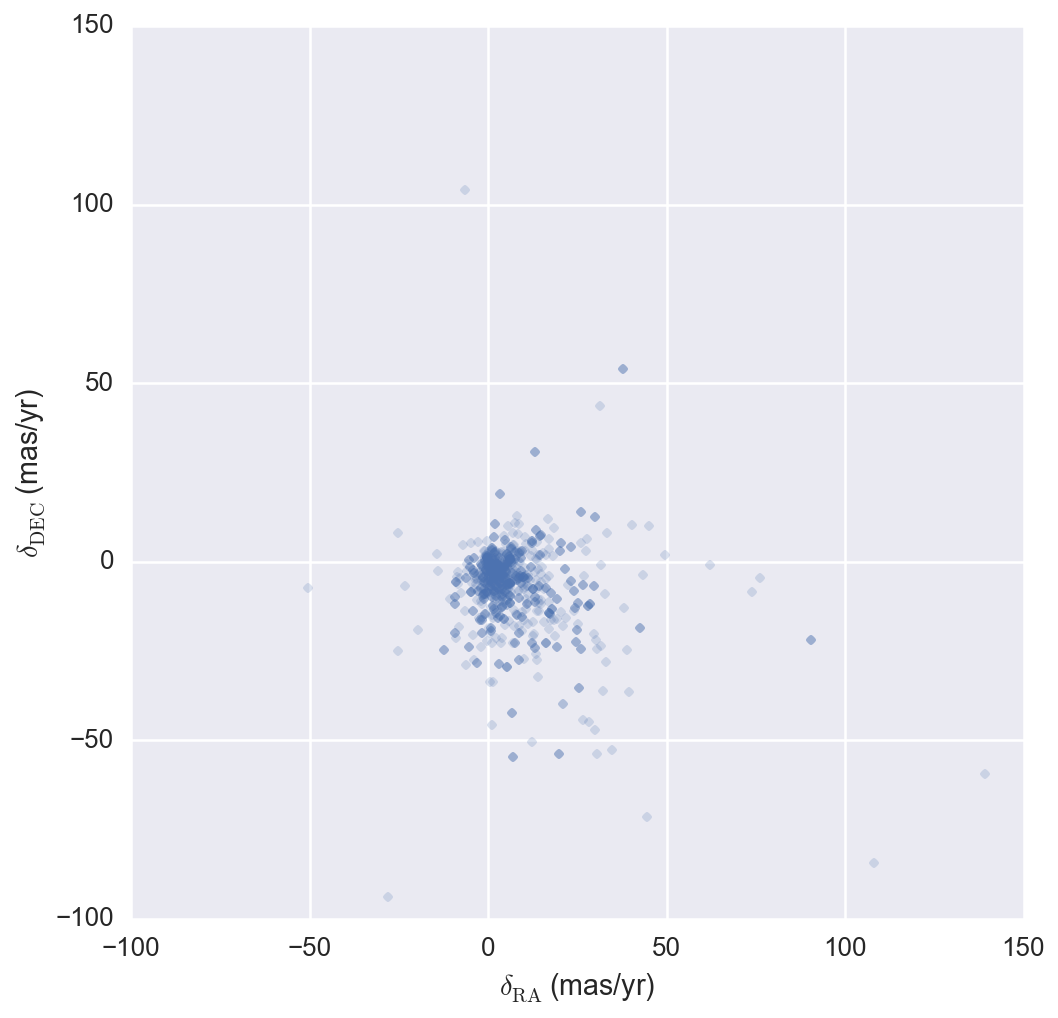

In [12]:
plt.figure(figsize=[8, 8])
plt.plot(gum.pmRA, gum.pmDE, '.', alpha=0.2)
plt.xlabel("$\delta_{\mathrm{RA}}$ (mas/yr)")
plt.ylabel("$\delta_{\mathrm{DEC}}$ (mas/yr)")

This is a typical proper motion scatter plot.

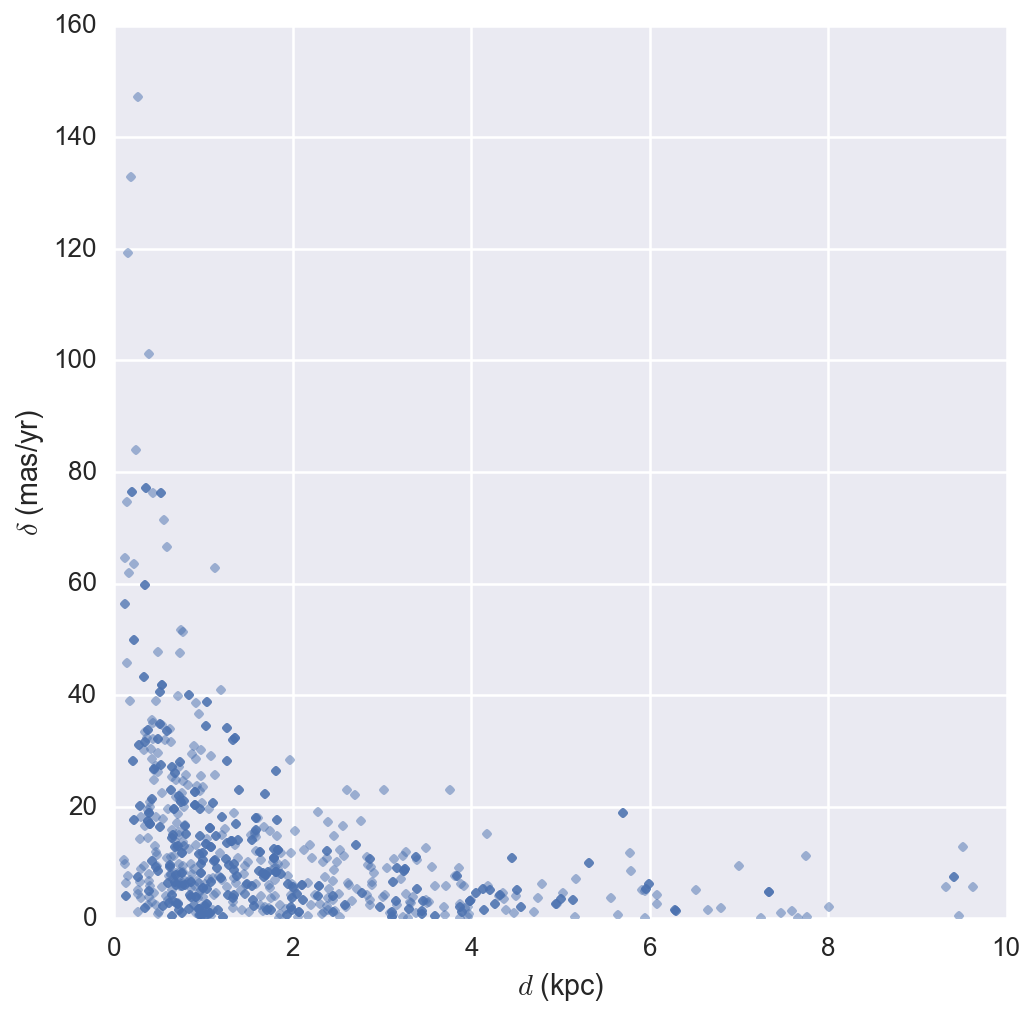

In [13]:
plt.figure(figsize=[8, 8])
pm = np.sqrt(gum.pmDE**2 + gum.pmDE**2)
plt.plot(gum.r/1000.0, pm, '.', alpha=0.5)
plt.xlabel("$d$ (kpc)")
plt.ylabel("$\delta$ (mas/yr)")

Large proper-motion sources are generally closer.

## Results

Overall I am dis-satisfied with the number of sources.  1000 is barely enough to do anything with.  I sort of wish it was a mock catalog: real stars with unknown distances, but with distances assigned based on some Galactic model and noised up according to the Gaia limitations.  Then we could do some cross-matching, etc.  As it stands, all I can do is make irrelevant plots.

So an interesting thing to do would be to make dummy clusters and sprinkle them into the data, and see if I can detect them from clustering.  That would let me hone an algorithm to then apply to real data.  But the truth is that this is way more complicated-- the Galactic potential starts to matter, extinction, binaries, variability.  So modeling this the right way is more complicated than a simple afternoon hack.

# The end.